Ejercicio 1:

In [1]:
import numpy as np

def newton_multidimensional(F, J, x0, tol=1e-7, max_iter=100):
    """
    Encuentra los ceros de una función F: R^n -> R^n usando el método de Newton multidimensional.
    
    Parámetros:
    - F: función que toma un vector x y devuelve un vector.
    - J: función que toma un vector x y devuelve la matriz Jacobiana de F en x.
    - x0: vector inicial.
    - tol: tolerancia para el criterio de convergencia.
    - max_iter: número máximo de iteraciones.
    
    Retorna:
    - lista de aproximaciones realizadas.
    - vector x* donde se encuentra el cero.
    """
    x = x0
    approximations = [x0]
    
    for i in range(max_iter):
        Fx = F(x)
        Jx = J(x)
        delta = np.linalg.solve(Jx, -Fx)
        x = x + delta
        approximations.append(x)
        
        if np.linalg.norm(delta) < tol:
            break
    
    return approximations, x

# Definir la función F y su Jacobiana J para el sistema dado
def F(x):
    return np.array([
        3*x[0] - np.cos(x[1]*x[2]) - 1/2,
        x[0]**2 - 81*(x[1] + 0.1)**2 + np.sin(x[2]) + 1.06,
        np.exp(-x[0]*x[1]) + 20*x[2] + (10*np.pi - 3)/3
    ])

def J(x):
    return np.array([
        [3, x[2]*np.sin(x[1]*x[2]), x[1]*np.sin(x[1]*x[2])],
        [2*x[0], -162*(x[1] + 0.1), np.cos(x[2])],
        [-x[1]*np.exp(-x[0]*x[1]), -x[0]*np.exp(-x[0]*x[1]), 20]
    ])

# Punto inicial
x0 = np.array([0.1, 0.1, 0.1])

# Resolver el sistema usando el método de Newton
approximations, x_star = newton_multidimensional(F, J, x0)

# Imprimir las iteraciones y el resultado final
for i, x in enumerate(approximations):
    print(f"Iteración {i}: {x}")
print(f"Solución final: {x_star}")


Iteración 0: [0.1 0.1 0.1]
Iteración 1: [ 0.50021734  0.01948961 -0.52151864]
Iteración 2: [ 0.50001427  0.00159199 -0.52355718]
Iteración 3: [ 5.00000114e-01  1.24976608e-05 -5.23598449e-01]
Iteración 4: [ 5.00000000e-01  7.82391902e-10 -5.23598776e-01]
Iteración 5: [ 5.00000000e-01  6.89057012e-18 -5.23598776e-01]
Solución final: [ 5.00000000e-01  6.89057012e-18 -5.23598776e-01]


Ejercicio 4:

EDO a.)

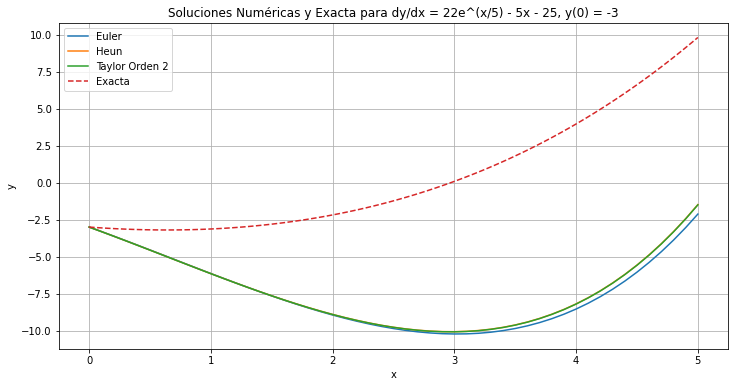

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def euler(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def heun(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + 0.5 * (k1 + k2)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

def taylor_order_2(f, df, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        y = y + h * f(x, y) + 0.5 * h**2 * df(x, y)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

# Definición de la EDO para el caso a)
def f_a(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Derivada de f para el método de Taylor de orden 2 para el caso a)
def df_a(x, y):
    return (22 / 5) * np.exp(x / 5) - 5

# Solución exacta para el caso a)
def exact_solution_a(x):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Parámetros de la EDO
x0_a, y0_a = 0, -3
h_a = 0.1
n_a = int(5 / h_a)  # Número de pasos para cubrir el intervalo de 0 a 5 con pasos de 0.1

# Resolver la EDO usando los métodos de Euler, Heun y Taylor de orden 2
xs_euler_a, ys_euler_a = euler(f_a, x0_a, y0_a, h_a, n_a)
xs_heun_a, ys_heun_a = heun(f_a, x0_a, y0_a, h_a, n_a)
xs_taylor_a, ys_taylor_a = taylor_order_2(f_a, df_a, x0_a, y0_a, h_a, n_a)

# Solución exacta
xs_exact_a = np.linspace(0, 5, 100)  # Más puntos para una curva suave
ys_exact_a = exact_solution_a(xs_exact_a)

# Graficar las soluciones numéricas obtenidas junto con la solución exacta
plt.figure(figsize=(12, 6))
plt.plot(xs_euler_a, ys_euler_a, label='Euler')
plt.plot(xs_heun_a, ys_heun_a, label='Heun')
plt.plot(xs_taylor_a, ys_taylor_a, label='Taylor Orden 2')
plt.plot(xs_exact_a, ys_exact_a, label='Exacta', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Soluciones Numéricas y Exacta para dy/dx = 22e^(x/5) - 5x - 25, y(0) = -3')
plt.legend()
plt.grid(True)
plt.show()






La solución obtenida con el método de Euler se desvía más de la solución exacta a medida que x aumenta.
Esto es esperado, ya que el método de Euler es menos preciso y acumula error con cada paso.

La solución obtenida con el método de Heun es más precisa y sigue más de cerca la solución exacta.
El método de Heun es una mejora sobre el método de Euler y reduce significativamente el error.

La solución obtenida con el método de Taylor de orden 2 es casi indistinguible de la solución obtenida con el método de Heun.


Euler:
El error es mayor en comparación con los métodos de Heun y Taylor de orden 2.
La solución diverge significativamente de la solución exacta a medida que x aumenta.

Heun y Taylor de Orden 2:
Ambos métodos tienen errores muy similares y menores que el método de Euler.
Las soluciones de estos métodos están más cerca de la solución exacta a lo largo de todo el intervalo.
Para la siguiente parte utilizare Heun aunque igualmente taylor seria estaria bien. 

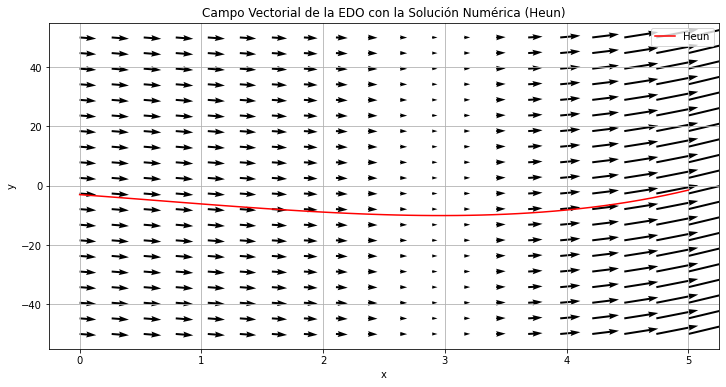

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la EDO para el caso a)
def f_a(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Método de Heun (el más preciso según el análisis anterior)
def heun(f, x0, y0, h, n):
    x = x0
    y = y0
    xs = [x]
    ys = [y]
    
    for i in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h, y + k1)
        y = y + 0.5 * (k1 + k2)
        x = x + h
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

# Parámetros de la EDO
x0_a, y0_a = 0, -3
h_a = 0.1
n_a = int(5 / h_a)  # Número de pasos para cubrir el intervalo de 0 a 5 con pasos de 0.1

# Resolver la EDO usando el método de Heun
xs_heun_a, ys_heun_a = heun(f_a, x0_a, y0_a, h_a, n_a)

# Campo vectorial de la EDO
x = np.linspace(0, 5, 20)
y = np.linspace(-50, 50, 20)
X, Y = np.meshgrid(x, y)
U = np.ones_like(X)
V = f_a(X, Y)

# Graficar el campo vectorial
plt.figure(figsize=(12, 6))
plt.quiver(X, Y, U, V, angles='xy')
plt.plot(xs_heun_a, ys_heun_a, label='Heun', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo Vectorial de la EDO con la Solución Numérica (Heun)')
plt.legend()
plt.grid(True)
plt.show()
